# PART I CLASSIFICATION

## Classification - Bank term deposit Prediction

This dataset has been synthesized from the dataset found at below link 

out of 11162 records poutcome column has 8326 unknown values so we choose to remove these records from the excel file to make the dataset length more easy to run for the time consuming algorithms


Dataset Link: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

### Features Description:

The dataset contains of 17 features

- age       : The age of the customer
- job       : Type of job
- marital   : Marital status of the customer
- education : Education of the customer
- default   : Whether customer has credit in default
- balance   : Current balance of the customer
- housing   : Whether the customer has housing loan
- loan      : Whether the customer has personal loan
- contact   : contact communication type
- day       : Last contact day of the month
- month     : Last contact month of the year
- duration  : Duration of last contact in seconds 
- campaign  : Number of contacts performed during this campaign and for this client
- pdays     : Number of days that passed by after the client was last contacted from a previous campaign 
- previous  : Number of contacts performed before this campaign and for this client
- poutcome  : Outcome of the previous marketing campaign
- deposit   : Whether the client has subscribed a term deposit this is our target variable




### Project Objective

- The objective of the project is to classify if the product (bank term deposit) would be ('yes') or not ('no') subscribed

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

### Reading the data

- We will import the trimmed file with 2836 rows as rows with poutcome = unknown have been removed from original file

In [2]:
import numpy as np
import pandas as pd

url = 'C:\\Users\\gaura\\Downloads\\bank.csv'

df_b = pd.read_csv(url)

df_b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,42,admin.,single,secondary,no,-247.0,yes,yes,telephone,21,oct,519.0,1,166,1,other,yes
1,33,services,married,secondary,no,3444.0,yes,no,telephone,21,oct,144.0,1,91,4,failure,yes
2,56,technician,married,secondary,no,589.0,yes,no,unknown,23,oct,518.0,1,147,2,success,yes
3,34,admin.,married,tertiary,no,899.0,yes,no,unknown,12,nov,114.0,1,170,3,failure,yes
4,53,retired,married,tertiary,no,2269.0,no,no,cellular,17,nov,1091.0,2,150,1,success,yes


### EDA (Exploratory Data Analysis)

- To get familiar with the data we will run some basic functions to understand the statistics of the data
  
  - Using shape to get the dimensions of the dataset like total number of rows and columns
  - Finding the statistics like max, min, count, std deviation, quartiles using the describe() it will give us an idea if there     are any missing values, range of the data
  - Info() will give us details about what are the datatypes of the columns, if a column has object datatype even if it has         numbers
  - values.tolist() will give us unique values so we can use it on categorical values to find unique values. From this we can       see few of the columns have "unknown" values which can be replaced ex. columns job,education have unknown values
  - Finding the percentage of missing values in each column by combining function like isna, sum, len

In [3]:
df_b.shape

(2836, 17)

In [4]:
df_b.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2836.000000,2828.000000,2836.000000,2823.000000,2836.000000,2836.000000,2836.000000
mean,41.783498,1786.599010,14.463329,344.228126,1.895628,204.861777,3.275740
std,12.981102,3698.152675,8.248974,278.854976,1.317780,122.223117,3.560134
min,18.000000,-1137.000000,1.000000,4.000000,1.000000,1.000000,1.000000
25%,32.000000,219.000000,8.000000,161.000000,1.000000,98.000000,1.000000
50%,38.000000,722.500000,14.000000,263.000000,1.000000,182.000000,2.000000
75%,50.000000,2064.500000,20.000000,436.500000,2.000000,286.000000,4.000000
max,93.000000,81204.000000,31.000000,2184.000000,12.000000,854.000000,58.000000


In [5]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2836 non-null   int64  
 1   job        2836 non-null   object 
 2   marital    2836 non-null   object 
 3   education  2836 non-null   object 
 4   default    2836 non-null   object 
 5   balance    2828 non-null   float64
 6   housing    2836 non-null   object 
 7   loan       2836 non-null   object 
 8   contact    2836 non-null   object 
 9   day        2836 non-null   int64  
 10  month      2836 non-null   object 
 11  duration   2823 non-null   float64
 12  campaign   2836 non-null   int64  
 13  pdays      2836 non-null   int64  
 14  previous   2836 non-null   int64  
 15  poutcome   2836 non-null   object 
 16  deposit    2836 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 376.8+ KB


#### From info function it looks like there are no missing values let's look into the values of each column

In [6]:
col = df_b.columns.values.tolist()
for col in df_b:
    if col not in['age','balance','day','duration','campaign','pdays','previous']:
        print('The no of unique values in {} is:{}'.format(col,df_b[col].unique()))
        
     

The no of unique values in job is:['admin.' 'services' 'technician' 'retired' 'entrepreneur' 'management'
 'unemployed' 'blue-collar' 'unknown' 'self-employed' 'housemaid'
 'student']
The no of unique values in marital is:['single' 'married' 'divorced']
The no of unique values in education is:['secondary' 'tertiary' 'primary' 'unknown']
The no of unique values in default is:['no' 'yes']
The no of unique values in housing is:['yes' 'no']
The no of unique values in loan is:['yes' 'no']
The no of unique values in contact is:['telephone' 'unknown' 'cellular']
The no of unique values in month is:['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
The no of unique values in poutcome is:['other' 'failure' 'success']
The no of unique values in deposit is:['yes' 'no']


In [7]:
df_b['contact'].value_counts()

cellular     2607
telephone     210
unknown        19
Name: contact, dtype: int64

#### If we impute the unknown values in contact column 92% of the values will be cellular hence we will drop the column as it will not affect the analysis in a greater sense

In [8]:
df_b.drop(['contact'], axis=1, inplace=True)

#### we can see that some of the columns like job and education have unknown values we will replace them with NaN values to get an idea of missing values

In [9]:
df_b = df_b.replace('unknown',np.nan)

#### Percentage of Missing values on each column

In [10]:
Missing_Values=(df_b.isna().sum(axis=0))
Missing_Values

age            0
job           19
marital        0
education    131
default        0
balance        8
housing        0
loan           0
day            0
month          0
duration      13
campaign       0
pdays          0
previous       0
poutcome       0
deposit        0
dtype: int64

In [11]:
Missing_values_percent=(df_b.isna().sum(axis=0)/len(df_b))*100
Missing_values_percent

age          0.000000
job          0.669958
marital      0.000000
education    4.619182
default      0.000000
balance      0.282087
housing      0.000000
loan         0.000000
day          0.000000
month        0.000000
duration     0.458392
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64

### Now that we have statistics on the data we can handle the missing values in the dataset.

- We can impute the missing values by replacing mode for categorical values and using mean values for numeric value

## Data Transformation

- Categorical columns job, education have missing values so for these columns we will use the mode of the columns to replace the missing values


- For Columns balance, duration we will use the mean of the columns to replace the missing values. The mean used will be the mean of the groups in the job column, as a job can affect the balance and also the duration to turn the term deposit to yes


- For columns like default, housing, loan, deposit they have binary values hence we will use mapping technique to turn these columns to into numerical format


- For columns job, marital, poutcome, month we will use one hot encoding to turn them into numerical format


- Column education is ordinal hence we will replace it with scaler values like assigning orders to the values ex. 'tertiary':3, 'secondary':2, 'primary':1

In [12]:
df_b['job'].fillna(df_b['job'].mode()[0], inplace=True)
df_b['education'].fillna(df_b['education'].mode()[0], inplace=True)

- As a job category can affect the balance so we will impute missing values in balance by taking means over the job category

In [13]:
df_b[["balance","job"]].groupby("job").mean()

,balance
job,
admin.,1281.762887
blue-collar,1165.844687
entrepreneur,1278.943396
housemaid,989.307692
management,2058.747312
retired,3009.577869
self-employed,2695.072165
services,1378.602041
student,1718.867133


In [14]:
df_b["balance"] = df_b.groupby("job")["balance"].transform(lambda x: x.fillna(x.mean()))

- Similarly for duration we will take the means over the different job categories

In [15]:
df_b[["duration","job"]].groupby("job").mean()

,duration
job,
admin.,322.628571
blue-collar,339.136612
entrepreneur,397.792453
housemaid,284.673077
management,346.220727
retired,406.926230
self-employed,344.857143
services,346.578680
student,322.601399


- Replacing the missing values for duration and balance column(above) by using the mean method

In [16]:
df_b["duration"] = df_b.groupby("job")["duration"].transform(lambda x: x.fillna(x.mean()))

- For columns with binary values like default, housing,loan we will replace them by mapping

In [17]:
df_b['default'] = df_b['default'].map( {'no': 1, 'yes': 0} ).astype(int)
df_b['housing'] = df_b['housing'].map({'no':1,'yes':0}).astype(int)
df_b['loan'] = df_b['loan'].map({'no':1,'yes':0}).astype(int)
df_b['deposit'] = df_b['deposit'].map( {'yes': 1, 'no': 0} ).astype(int)

- Replacing the categorical values with one hot encoding

In [18]:
job_dummy = pd.get_dummies(df_b['job'],columns='job',prefix='job')
df_b=pd.concat([df_b, job_dummy], axis=1)
df_b.drop(['job'],axis=1,inplace= True)

In [19]:
marital_dummy = pd.get_dummies(df_b['marital'],columns='marital',prefix='marital')
df_b=pd.concat([df_b,marital_dummy], axis=1)
df_b.drop(['marital'],axis=1,inplace= True)

In [20]:
poutcome_dummy = pd.get_dummies(df_b['poutcome'],columns='poutcome',prefix='poutcome')
df_b=pd.concat([df_b, poutcome_dummy], axis=1)
df_b.drop(['poutcome'],axis=1,inplace= True)


In [21]:
month_dummy = pd.get_dummies(df_b['month'],columns='month',prefix='month')
df_b=pd.concat([df_b, month_dummy], axis=1)
df_b.drop(['month'],axis=1,inplace= True)


- As education is a ordinal value we will replace it with scaler values

In [22]:
scale_mapper = {'tertiary':3,'secondary':2,'primary':1}
df_b['education'].replace(scale_mapper,inplace= True)


### Final dataset after data preparation
- We can see that all the columns now have Dtype that is not object

In [23]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2836 non-null   int64  
 1   education          2836 non-null   int64  
 2   default            2836 non-null   int32  
 3   balance            2836 non-null   float64
 4   housing            2836 non-null   int32  
 5   loan               2836 non-null   int32  
 6   day                2836 non-null   int64  
 7   duration           2836 non-null   float64
 8   campaign           2836 non-null   int64  
 9   pdays              2836 non-null   int64  
 10  previous           2836 non-null   int64  
 11  deposit            2836 non-null   int32  
 12  job_admin.         2836 non-null   uint8  
 13  job_blue-collar    2836 non-null   uint8  
 14  job_entrepreneur   2836 non-null   uint8  
 15  job_housemaid      2836 non-null   uint8  
 16  job_management     2836 

In [24]:
df_b.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,42,2,1,-247.0,0,0,21,519.0,1,166,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33,2,1,3444.0,0,1,21,144.0,1,91,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,56,2,1,589.0,0,1,23,518.0,1,147,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,34,3,1,899.0,0,1,12,114.0,1,170,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,53,3,1,2269.0,1,1,17,1091.0,2,150,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the Data and scaling

- We will use the train_test_split to split the dataset into train and test data
- We will use the MinMax Scaler: MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

In [25]:
from sklearn.model_selection import train_test_split

X= df_b.drop(['deposit'], axis=1)
y = df_b['deposit']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [27]:
# importing necessary libraries 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## Classification: Models

The following classifiers are implemented in the next part:
* K Nearest Neighbor
* Logistic Regression
* Linear SVC
* Kernalized SVC - Linear
* Kernalized SVC - rbf
* Kernalized SVC - poly
* Decision Tree    


## KNN classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors': np.arange(1, 20)}
knn_grid = GridSearchCV(knn_classifier, param_grid=parameters,cv = 10)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
print("Best Score for KNN classification from grid search: ",knn_grid.best_score_)
print("Best parameter for KNN classificaion from grid search: ",knn_grid.best_params_)

Best Score for KNN classification from grid search:  0.770110284347595
Best parameter for KNN classificaion from grid search:  {'n_neighbors': 19}


In [30]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [31]:
cross_val_scores_knn = cross_val_score(knn,X_train, y_train,cv=10)

In [32]:
print('The Cross validation scores for the training set for KNN is:{}'.format(cross_val_scores_knn))
print('The Mean Cross validation score for training set for KNN is:{}'.format(np.mean(cross_val_scores_knn)))

The Cross validation scores for the training set for KNN is:[0.77934272 0.78873239 0.71361502 0.79812207 0.76056338 0.74178404
 0.78403756 0.78301887 0.79716981 0.75471698]
The Mean Cross validation score for training set for KNN is:0.770110284347595


In [33]:
knn_test_predict = knn.predict(X_test)
knn_train_predict=knn.predict(X_train)
print(classification_report(y_test,knn_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,knn_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,knn_test_predict)))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       252
           1       0.81      0.84      0.83       457

    accuracy                           0.77       709
   macro avg       0.75      0.74      0.74       709
weighted avg       0.77      0.77      0.77       709

The Train score is:0.7884344146685472
The Test score is:0.770098730606488


In [34]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    train_score_array.append(knn_classifier.score(X_train, y_train))
    test_score_array.append(knn_classifier.score(X_test, y_test))

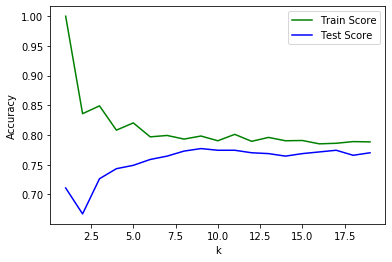

In [35]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

## LogisticRegression

In [36]:
# importing required libraries
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(random_state=0)

In [37]:

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l2']}]
               
log_grid =GridSearchCV(estimator = log_classifier,
                           param_grid = parameters,
                         cv = 10)
               
log_grid = log_grid.fit(X_train,y_train)

In [38]:

print("Best Score for Logistic classification from grid search: ",log_grid.best_score_)
print("Best parameter for Logistic classificaion from grid search: ",log_grid.best_params_)

Best Score for Logistic classification from grid search:  0.830740100983258
Best parameter for Logistic classificaion from grid search:  {'C': 10, 'penalty': 'l2'}


In [39]:
logC = LogisticRegression(penalty = 'l2', C = 10, random_state=0)
logC.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
cross_val_scores_logC = cross_val_score(logC,X_train, y_train,cv=10)

In [41]:
print('The Cross validation scores for the training set for Logistic is:{}'.format(cross_val_scores_logC))
print('The Mean Cross val score for training set for Logistic is:{}'.format(np.mean(cross_val_scores_logC)))

The Cross validation scores for the training set for Logistic is:[0.84976526 0.80751174 0.83568075 0.85446009 0.81690141 0.79812207
 0.8685446  0.83490566 0.84433962 0.79716981]
The Mean Cross val score for training set for Logistic is:0.830740100983258


In [42]:
logC_test_predict = logC.predict(X_test)
logC_train_predict=logC.predict(X_train)
print(classification_report(y_test,logC_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,logC_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,logC_test_predict)))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       252
           1       0.84      0.90      0.87       457

    accuracy                           0.83       709
   macro avg       0.82      0.80      0.81       709
weighted avg       0.83      0.83      0.82       709

The Train score is:0.84109073812882
The Test score is:0.8279266572637518


In [43]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_array = []
test_score_array = []

for c in c_range:
    
    logC_classifier = LogisticRegression(penalty = 'l2', C = c,random_state=0)
    logC_classifier.fit(X_train, y_train)
    train_score_array.append(logC_classifier.score(X_train, y_train))
    test_score_array.append(logC_classifier.score(X_test, y_test))
    

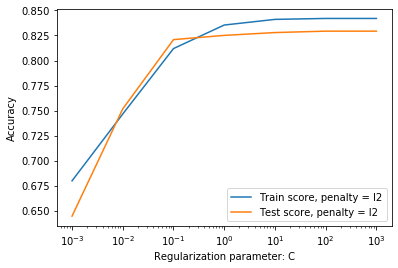

In [44]:
%matplotlib inline

plt.plot(c_range, train_score_array, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_array, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

## LinearSVC

In [45]:
from sklearn.svm import LinearSVC

lsvc_classifier = LinearSVC()

In [46]:


parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]}]
               
lsvc_grid =GridSearchCV(estimator = lsvc_classifier,
                           param_grid = parameters,cv = 10)
               
lsvc_grid = lsvc_grid.fit(X_train,y_train)

In [47]:
print("Best Score for LinearSVC classification from grid search: ",lsvc_grid.best_score_)
print("Best parameter for LinearSVC classificaion from grid search: ",lsvc_grid.best_params_)


Best Score for LinearSVC classification from grid search:  0.829801133847108
Best parameter for LinearSVC classificaion from grid search:  {'C': 10}


In [48]:
lsvc = LinearSVC(C=10)
lsvc.fit(X_train, y_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [49]:
cross_val_scores_lsvc= cross_val_score(lsvc,X_train, y_train,cv=10)

In [50]:
print('The Cross validation scores for the training set for LinearSVC is:{}'.format(cross_val_scores_lsvc))
print('The Mean Cross val score for training set for LinearSVC is:{}'.format(np.mean(cross_val_scores_lsvc)))

The Cross validation scores for the training set for LinearSVC is:[0.84507042 0.8028169  0.83568075 0.84976526 0.81690141 0.79342723
 0.87323944 0.83490566 0.84433962 0.78773585]
The Mean Cross val score for training set for LinearSVC is:0.8283882540526177


In [51]:
lsvc_test_predict = lsvc.predict(X_test)
lsvc_train_predict=lsvc.predict(X_train)
print(classification_report(y_test,lsvc_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,lsvc_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,lsvc_test_predict)))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74       252
           1       0.84      0.90      0.87       457

    accuracy                           0.83       709
   macro avg       0.82      0.80      0.81       709
weighted avg       0.83      0.83      0.83       709

The Train score is:0.8392101551480959
The Test score is:0.8293370944992948


In [52]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for alpha in x_range: 
    lsvc_classifier = LinearSVC(C=alpha, random_state=0)
    lsvc_classifier.fit(X_train, y_train)
    train_score_array.append(lsvc_classifier.score(X_train, y_train))
    test_score_array.append(lsvc_classifier.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

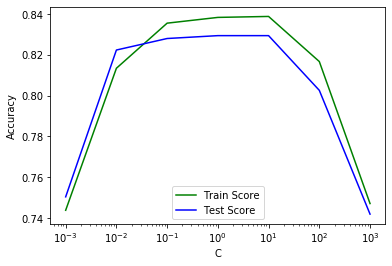

In [53]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.xlabel('Regularization parameter: C')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')




## Kernelized SVC (linear)

In [54]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear')

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]}]

svc_grid =  GridSearchCV(estimator = svc_classifier,
                           param_grid = parameters,
                         cv = 10)

svc_grid  = svc_grid .fit(X_train,y_train)

In [55]:
print("Best Score for linear kernel svc classification from grid search: ",svc_grid.best_score_)
print("Best parameter for linear kernel svc classificaion from grid search: ",svc_grid.best_params_)

Best Score for linear kernel svc classification from grid search:  0.8316857117548055
Best parameter for linear kernel svc classificaion from grid search:  {'C': 1000}


In [56]:
svcl = SVC(kernel='linear',C=1000)
svcl.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
cross_val_scores_svcl= cross_val_score(svcl ,X_train, y_train,cv=10)

In [58]:
print('The Cross validation scores for the training set for linear kernel svc is:{}'.format(cross_val_scores_svcl))
print('The Mean Cross val score for training set for linear kernel svc is:{}'.format(np.mean(cross_val_scores_svcl)))

The Cross validation scores for the training set for linear kernel svc is:[0.84507042 0.79812207 0.82159624 0.84976526 0.84037559 0.79812207
 0.87323944 0.84433962 0.83962264 0.80660377]
The Mean Cross val score for training set for linear kernel svc is:0.8316857117548055


In [59]:
svcl_test_predict = svcl.predict(X_test)
svcl_train_predict = svcl.predict(X_train)
print(classification_report(y_test,svcl_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,svcl_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,svcl_test_predict)))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       252
           1       0.85      0.91      0.88       457

    accuracy                           0.84       709
   macro avg       0.83      0.81      0.82       709
weighted avg       0.83      0.84      0.83       709

The Train score is:0.8359191349318289
The Test score is:0.8363892806770099


In [60]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for alpha in x_range: 
    svcl_classifier = SVC(kernel='linear',C=alpha,random_state=0)
    svcl_classifier.fit(X_train, y_train)
    train_score_array.append(svcl_classifier.score(X_train, y_train))
    test_score_array.append(svcl_classifier.score(X_test, y_test))
    
    

Text(0.5, 0, 'Regularization parameter: C')

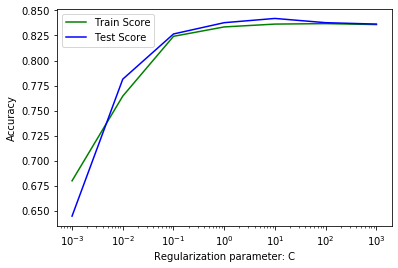

In [61]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')




## Kernelized SVC (RBF)

In [62]:
from sklearn.svm import SVC

rsvc_classifier = SVC(kernel='rbf')

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100,1000],'gamma':[0.1,0.2,0.3,0.4,0.5]}]

rsvc_grid =  GridSearchCV(estimator = rsvc_classifier,
                           param_grid = parameters,
                         cv = 10)

rsvc_grid  = rsvc_grid.fit(X_train,y_train)
                

In [63]:
print("Best Score for RBF kernel svc classification from grid search: ",rsvc_grid.best_score_)
print("Best parameter for RBF kernel svc classificaion from grid search: ",rsvc_grid.best_params_)

Best Score for RBF kernel svc classification from grid search:  0.817131721144477
Best parameter for RBF kernel svc classificaion from grid search:  {'C': 10, 'gamma': 0.1}


In [64]:
rsvc = SVC(kernel='rbf',C=10,gamma=0.1)
rsvc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
cross_val_scores_rsvc= cross_val_score(rsvc,X_train, y_train,cv=10)

In [66]:
print('The Cross validation scores for the training set for RBF kernel svc is:{}'.format(cross_val_scores_rsvc))
print('The Mean Cross val score for training set for RBF kernel svc is:{}'.format(np.mean(cross_val_scores_rsvc)))

The Cross validation scores for the training set for RBF kernel svc is:[0.82629108 0.8028169  0.78403756 0.84037559 0.81220657 0.77464789
 0.84037559 0.83490566 0.83962264 0.81603774]
The Mean Cross val score for training set for RBF kernel svc is:0.817131721144477


In [67]:
rsvc_test_predict = rsvc.predict(X_test)
rsvc_train_predict =rsvc.predict(X_train)
print(classification_report(y_test,rsvc_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,rsvc_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,rsvc_test_predict)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       252
           1       0.86      0.91      0.88       457

    accuracy                           0.84       709
   macro avg       0.83      0.82      0.82       709
weighted avg       0.84      0.84      0.84       709

The Train score is:0.8725905030559473
The Test score is:0.842031029619182


In [68]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for alpha in x_range: 
    rsvc_classifier = SVC(kernel='rbf',C=alpha,gamma=0.1)
    rsvc_classifier.fit(X_train, y_train)
    train_score_array.append(rsvc_classifier.score(X_train, y_train))
    test_score_array.append(rsvc_classifier.score(X_test, y_test))

Text(0.5, 0, 'Regularization parameter: C')

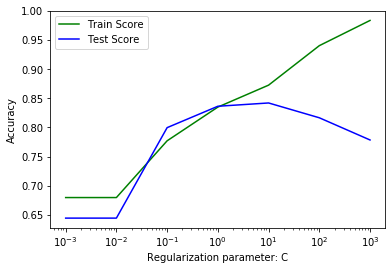

In [69]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')




## Kernelized SVC (Poly)

In [70]:
from sklearn.svm import SVC

psvc_classifier = SVC(kernel='poly')

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100],'degree':[1,2,3,4,5]}]

psvc_grid =  GridSearchCV(estimator = psvc_classifier,
                           param_grid = parameters,
                         cv = 10)

psvc_grid = psvc_grid.fit(X_train,y_train)
                
                

In [71]:
print("Best Score for Poly kernel svc classification from grid search: ",psvc_grid.best_score_)
print("Best parameter for Poly kernel svc classificaion from grid search: ",psvc_grid.best_params_)

Best Score for Poly kernel svc classification from grid search:  0.8293316502790326
Best parameter for Poly kernel svc classificaion from grid search:  {'C': 10, 'degree': 1}


In [72]:
psvc = SVC(kernel='poly',C=10,degree=1)
psvc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
cross_val_scores_psvc= cross_val_score(psvc,X_train, y_train,cv=10)

In [74]:
print('The Cross validation scores for the training set for Poly Kernel svc is:{}'.format(cross_val_scores_psvc))
print('The Mean Cross val score for training set or Poly Kernel svc is:{}'.format(np.mean(cross_val_scores_psvc)))

The Cross validation scores for the training set for Poly Kernel svc is:[0.85915493 0.79812207 0.81690141 0.84507042 0.84037559 0.79342723
 0.86384977 0.85377358 0.83018868 0.79245283]
The Mean Cross val score for training set or Poly Kernel svc is:0.8293316502790326


In [75]:
psvc_test_predict = psvc.predict(X_test)
psvc_train_predict = psvc.predict(X_train)
print(classification_report(y_test,psvc_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,psvc_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,psvc_test_predict)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       252
           1       0.85      0.91      0.88       457

    accuracy                           0.84       709
   macro avg       0.83      0.81      0.82       709
weighted avg       0.84      0.84      0.84       709

The Train score is:0.8368594264221909
The Test score is:0.840620592383639


In [76]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    psvc_classifier = SVC(kernel='poly',C=alpha,degree=1)
    psvc_classifier.fit(X_train, y_train)
    train_score_array.append(psvc_classifier.score(X_train, y_train))
    test_score_array.append(psvc_classifier.score(X_test, y_test))

Text(0.5, 0, 'Regularization parameter: C')

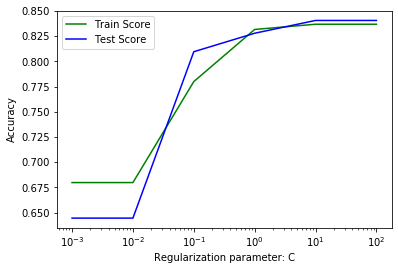

In [77]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')




## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier


dt_classifier = DecisionTreeClassifier(random_state = 0)


parameters = {'max_depth': np.arange(1, 20)}

dt_grid = GridSearchCV(dt_classifier, parameters, cv = 10)


dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19

In [79]:
print("Best Score for Decision Tree classification from grid search: ",dt_grid.best_score_)
print("Best parameter for Decision Tree classificaion from grid search: ",dt_grid.best_params_)

Best Score for Decision Tree classification from grid search:  0.8100341039950394
Best parameter for Decision Tree classificaion from grid search:  {'max_depth': 5}


In [80]:
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
cross_val_scores_dt = cross_val_score(dt,X_train, y_train,cv=10)

In [82]:
print('The Cross validation scores for the training set for Decision tree is:{}'.format(cross_val_scores_dt))
print('The Mean Cross val score for training set for Decision tree is:{}'.format(np.mean(cross_val_scores_dt)))

The Cross validation scores for the training set for Decision tree is:[0.84037559 0.81690141 0.79812207 0.82629108 0.79342723 0.80751174
 0.84507042 0.77358491 0.80660377 0.79245283]
The Mean Cross val score for training set for Decision tree is:0.8100341039950394


In [83]:
dt_test_predict = dt.predict(X_test)
dt_train_predict=dt.predict(X_train)
print(classification_report(y_test,dt_test_predict))
print('The Train score is:{}'.format(accuracy_score(y_train,dt_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,dt_test_predict)))

              precision    recall  f1-score   support

           0       0.76      0.65      0.71       252
           1       0.82      0.89      0.85       457

    accuracy                           0.81       709
   macro avg       0.79      0.77      0.78       709
weighted avg       0.80      0.81      0.80       709

The Train score is:0.844381758345087
The Test score is:0.8053596614950634


In [84]:
train_score_array = []
test_score_array = []
max_dep = np.arange(1, 20)

for depth in max_dep: 
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train,y_train)
    train_score_array.append(dt_classifier.score(X_train,y_train))
    test_score_array.append(dt_classifier.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

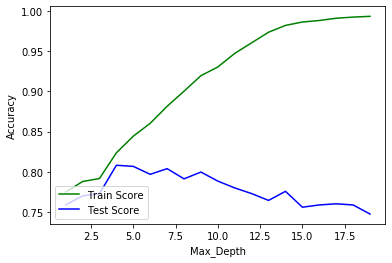

In [85]:
plt.plot(max_dep, train_score_array, c = 'g', label = 'Train Score')
plt.plot(max_dep, test_score_array, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')


## Classification Model Comparisons

In [86]:
df_index=['KNN','Logistic','Linear SVC','SVC Linear Kernel','SVC rbf Kernel','SVC Poly Kernel','Decision Tree']
Classification_Result=pd.DataFrame(columns=['Model_Name','Best_Parameter','Training_score','CV_Score','Testing_score','F1_score','Recall'],index=df_index)
Classification_Result['Model_Name']=Classification_Result.index

In [87]:
### Results for KNN
Classification_Result.loc['KNN']['Best_Parameter']='K=19'
Classification_Result.loc['KNN']['Training_score']=0.7884
Classification_Result.loc['KNN']['CV_Score']=0.7701
Classification_Result.loc['KNN']['Testing_score']=0.7700
Classification_Result.loc['KNN']['F1_score']=0.83
Classification_Result.loc['KNN']['Recall']=0.84

In [88]:
### Results for Logistic Regression
Classification_Result.loc['Logistic']['Best_Parameter']='C=10'
Classification_Result.loc['Logistic']['Training_score']= 0.8410
Classification_Result.loc['Logistic']['CV_Score']=0.8307
Classification_Result.loc['Logistic']['Testing_score']= 0.8279
Classification_Result.loc['Logistic']['F1_score']=0.87
Classification_Result.loc['Logistic']['Recall']=0.90

In [89]:
### Results for Linear SVC
Classification_Result.loc['Linear SVC']['Best_Parameter']='C=10'
Classification_Result.loc['Linear SVC']['Training_score']=0.8382
Classification_Result.loc['Linear SVC']['CV_Score']=0.8288
Classification_Result.loc['Linear SVC']['Testing_score']=0.8293
Classification_Result.loc['Linear SVC']['F1_score']=0.87
Classification_Result.loc['Linear SVC']['Recall']=0.90

In [90]:
### Results for SVC Linear Kernel
Classification_Result.loc['SVC Linear Kernel']['Best_Parameter']='C=1000'
Classification_Result.loc['SVC Linear Kernel']['Training_score']=0.8359
Classification_Result.loc['SVC Linear Kernel']['CV_Score']=0.8316
Classification_Result.loc['SVC Linear Kernel']['Testing_score']=0.8363
Classification_Result.loc['SVC Linear Kernel']['F1_score']=0.88
Classification_Result.loc['SVC Linear Kernel']['Recall']=0.91

In [91]:
### Results for SVC rbf Kernel
Classification_Result.loc['SVC rbf Kernel']['Best_Parameter']='c= 10, gamma =0.1'
Classification_Result.loc['SVC rbf Kernel']['Training_score']=0.8725
Classification_Result.loc['SVC rbf Kernel']['CV_Score']=0.8171
Classification_Result.loc['SVC rbf Kernel']['Testing_score']=0.8420
Classification_Result.loc['SVC rbf Kernel']['F1_score']=0.88
Classification_Result.loc['SVC rbf Kernel']['Recall']=0.91

In [92]:
### Results for SVC Poly Kernel
Classification_Result.loc['SVC Poly Kernel']['Best_Parameter']='C= 10,degree =1'
Classification_Result.loc['SVC Poly Kernel']['Training_score']=0.8368
Classification_Result.loc['SVC Poly Kernel']['CV_Score']=00.8293
Classification_Result.loc['SVC Poly Kernel']['Testing_score']=0.8406
Classification_Result.loc['SVC Poly Kernel']['F1_score']=0.88
Classification_Result.loc['SVC Poly Kernel']['Recall']=0.91

In [93]:
### Results for Decision Tree
Classification_Result.loc['Decision Tree']['Best_Parameter']='Max_depth =5'
Classification_Result.loc['Decision Tree']['Training_score']=0.8443
Classification_Result.loc['Decision Tree']['CV_Score']=0.8100
Classification_Result.loc['Decision Tree']['Testing_score']=0.8053
Classification_Result.loc['Decision Tree']['F1_score']=0.85
Classification_Result.loc['Decision Tree']['Recall']=0.89

In [94]:
Classification_Result

,Model_Name,Best_Parameter,Training_score,CV_Score,Testing_score,F1_score,Recall
KNN,KNN,K=19,0.7884,0.7701,0.77,0.83,0.84
Logistic,Logistic,C=10,0.841,0.8307,0.8279,0.87,0.9
Linear SVC,Linear SVC,C=10,0.8382,0.8288,0.8293,0.87,0.9
SVC Linear Kernel,SVC Linear Kernel,C=1000,0.8359,0.8316,0.8363,0.88,0.91
SVC rbf Kernel,SVC rbf Kernel,"c= 10, gamma =0.1",0.8725,0.8171,0.842,0.88,0.91
SVC Poly Kernel,SVC Poly Kernel,"C= 10,degree =1",0.8368,0.8293,0.8406,0.88,0.91
Decision Tree,Decision Tree,Max_depth =5,0.8443,0.81,0.8053,0.85,0.89


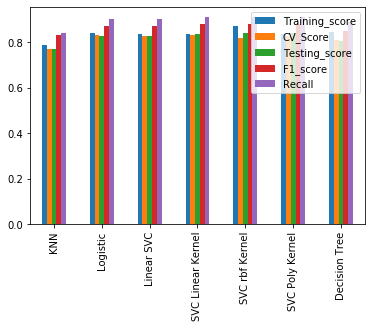

In [95]:
Classification_Result[['Training_score','CV_Score','Testing_score','F1_score','Recall']].plot(kind='bar')

#### Evaluation Metric Used: High F1 score with High Recall and Better generalization(Difference between train,CV and test scores should be minimal)

#### Recall = TP/(TP+FN) ; TP --> True Positive ;  FN ---> False Negative

* High F1 score in Predicting the deposit term: F1 is the accuracy of the model on how many Yes and No  customer are actually classified correclty from the whole datapoints. High F1 score means less mis-classification.Hence this can be used as a major metric along with High Recall.
* High Recall: It is predicting more TP and Less FN. Having FN(predicting Yes as No leads to loosing the customer base which inturn decreases the revenue of the bank. Hence FN should be minimum as a result Recall will be high)

### Hence the model with High F1 score along with High Recall is considered as a best model

### Best Model: SVC with Poly kernel
* All kernelized SVC algorithms have high recall and high F1 score however in Linear kernel the Parameter C is very high when compared to others. Small values of C give larger margin between the decision boundary and the datapoints and also better regularization. So model with less value for C should be chosen
* For the remaining kernels (poly and rbf) for rbf the difference between train,cv and test scores is not minimal compared to Poly
* Hence Kernelized SVC(Poly) is considered as a best model among all the models.